# Get the data


In [4]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request


def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
        housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))


housing = load_housing_data()

## Take a Quick Look at the Data Structure


In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
# extra code – code to save the figures as high-res PNGs for the book
import matplotlib.pyplot as plt
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

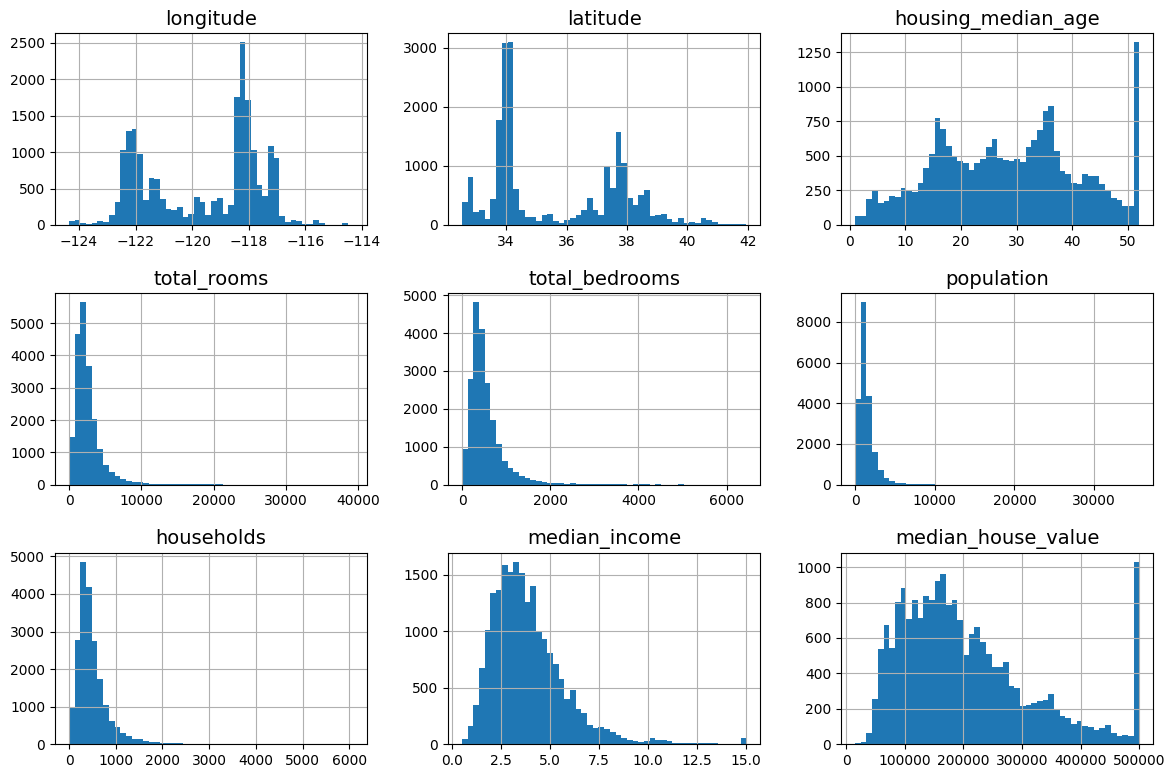

In [11]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

## Create a Test Set


In [12]:

import numpy as np


def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

16512

In [14]:
len(test_set)

4128

In [15]:
# To ensure that this notebook's outputs remain the same every time
np.random.seed(42)

- Cách làm trên dù tốt nhưng có vấn đề xảy ra là mỗi lần chạy hàm sẽ trả ra một kết quả khác nhau
- Có thể được khắc phục bằng cách `np.random.seed(x)`
- Tuy nhiên với cả 2 cách trên kết quả vẫn thay đổi nếu ta thêm dữ liệu vào tập dữ liệu ban đâu

$\Rightarrow$ tạo thêm một cột id và sử dụng hàm băm để kiểm tra xem nó thuộc tập test hay train, id sẽ không thay đổi khi thêm hoặc xóa mẫu


In [16]:
# train_test_spli in sklearn can also be used
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [18]:
import hashlib


def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio


def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(
        id_, test_ratio, hash))  # apply same foreach
    # data.loc = truyền vào list true, false trả ra những phân tử ở vị trí true
    return data.loc[~in_test_set], data.loc[in_test_set]

In [19]:
housing_with_id = housing.reset_index()  # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [20]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [21]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [22]:
test_set["total_bedrooms"].isnull().sum()

np.int64(44)

In [23]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

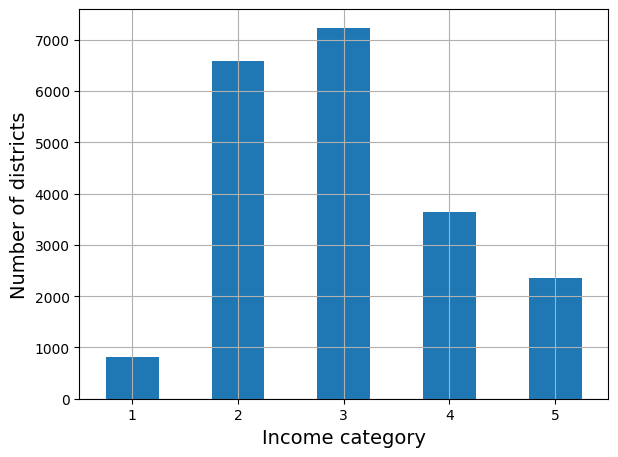

In [24]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
save_fig("housing_income_cat_bar_plot")  # extra code
plt.show()

- Hầu hết các dữ liệu đều tập trung trong khoảng từ 2 đến 5. Nhưng có những điểm vượt rất xa số 6.
- Chúng ta cần làm cho số lượng dữ liệu trong các khoảng có một số lượng đủ lờn


In [25]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_14912\238931313.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)


In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [27]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [28]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: count, dtype: float64

In [29]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights


In [30]:
housing = strat_train_set.copy()

## Visualizing Geographical Data


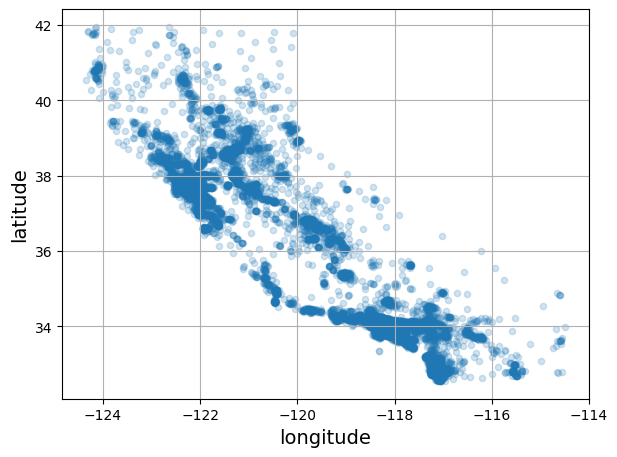

In [31]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
save_fig("better_visualization_plot")  # extra code
plt.show()

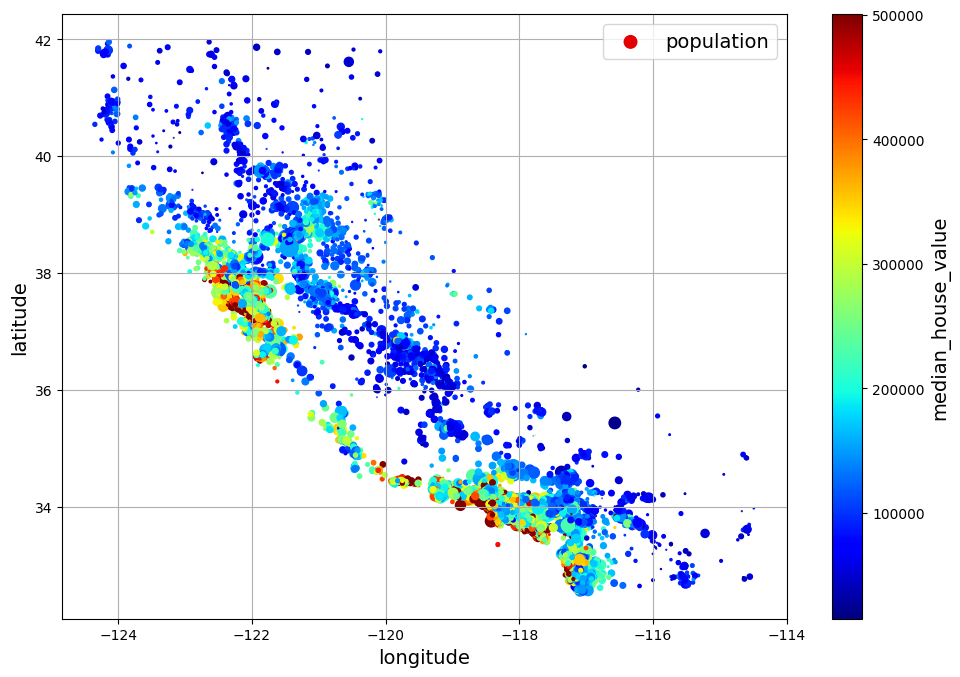

In [32]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
save_fig("housing_prices_scatterplot")  # extra code
plt.show()

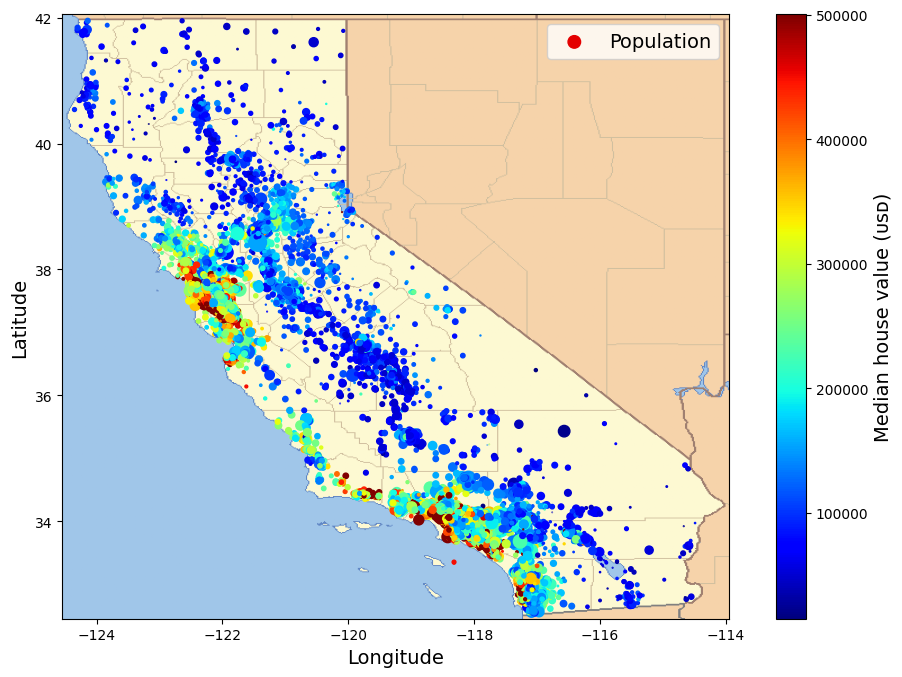

In [33]:
# extra code – this cell generates the first figure in the chapter

# Download the California image
filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
    kind="scatter", x="Longitude", y="Latitude",
    s=housing_renamed["Population"] / 100, label="Population",
    c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
    legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

save_fig("california_housing_prices_plot")
plt.show()

Từ hình ảnh này có thể thấy giá nhà liên quan nhiều đến vị trí và mật độ dân số


## Looking for Correlations


Vì dataset không lớn ta có thể tính được tương quan giữa các feature.


In [34]:
corr_matrix = housing.corr(numeric_only=True)

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

- Hệ số tương quan nằm trong khoảng -1 đến 1. Càng gần 1 tương quan tích cực càng mạnh mẽ (đồng biến) và ngược lại. Càng gần 0 thì càng ít quan hệ tương quan. Ex: median_income càng cao thì median_house_value càng cao


- Một cách khác để kiểm chứng độ tương quan giữa các feature là sử dụng `pandas`


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

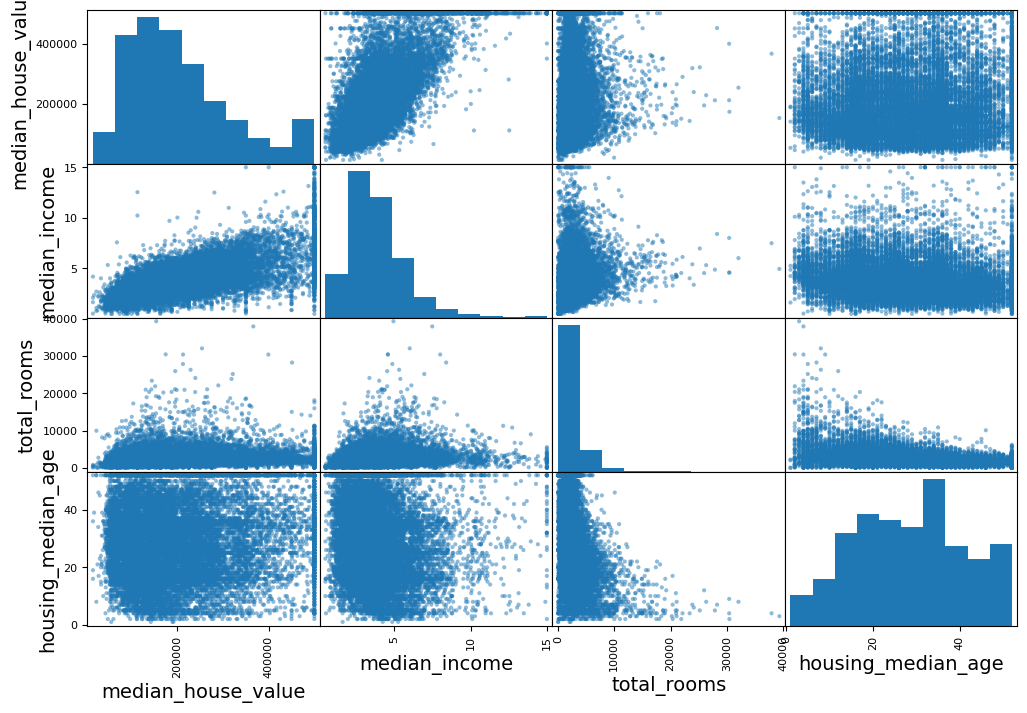

In [35]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

- Ta thấy độ tương quan giữa `median_income` và `median_house_value` là triển vọng nhất (dạng linear).


<Axes: xlabel='median_income', ylabel='median_house_value'>

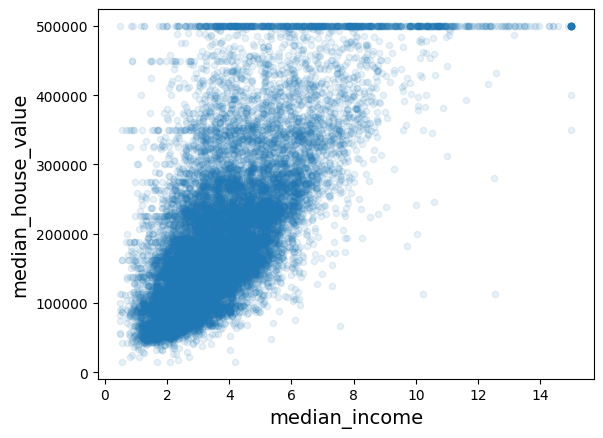

In [36]:
# Let’s zoom in on their correlation scatterplot
housing.plot(kind="scatter", x="median_income",
             y="median_house_value", alpha=0.1)

## Experimenting with Attribute Combinations


- Chúng ta có thể nhận thấy rằng ở một số feature các điểm dữ liệu về đuôi rất lớn, chúng ta cần thiết phải biến đổi chúng trước khi đưa vào các thuật toán ML
- Một trong số các cách biến đổi đó là thử kết hợp các feature với nhau. Ex. feature `total_rooms` trong một quận có vẻ không hữu ích lắm nếu ta không biết có bao nhiêu hộ gia đình, vì vậy có thế dùng một feature `rooms_per_household` có vẻ sẽ hữu ích hơn


In [37]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"] / \
    housing["households"]

In [38]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688380
rooms_per_household         0.143663
total_rooms                 0.137455
housing_median_age          0.102175
households                  0.071426
total_bedrooms              0.054635
population                 -0.020153
population_per_household   -0.038224
longitude                  -0.050859
latitude                   -0.139584
bedrooms_per_room          -0.256397
Name: median_house_value, dtype: float64

Kết quả tốt hơn 1 chút


# Prepare Data for Machine Learning Algorithms


In [39]:
# remove labels
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## Data Cleaning


Các cách để sử lí việc mất dữ liệu

- Loại bỏ mẫu đó
- Loại bỏ feature bị thiếu
- Tự điền giá trị (0, trung vị, giá trị kì vọng, ...)


In [40]:
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN


In [41]:
housing.dropna(subset=["total_bedrooms"])  # option 1
housing.drop("total_bedrooms", axis=1)  # option 2
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median)  # option 3

13096    1115.0
14973     354.0
3785      217.0
14689     851.0
20507    1211.0
          ...  
14207     597.0
13105     592.0
19301     775.0
19121     873.0
19888     195.0
Name: total_bedrooms, Length: 16512, dtype: float64

Scikit-learn cung cấp một lớp để kiêm soát việc mất data


In [42]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# remove non-numerical attribute
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [43]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292


In [44]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [45]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [46]:
X = imputer.transform(housing_num)
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [47]:
# put back X to data frame
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

null_rows_idx = housing_tr.isnull().any(axis=1)
housing_tr.loc[null_rows_idx].head()
# all missing data is filled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income


## Hanlding Text and Categorical Attributes


In [48]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [49]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

c:\Users\PC\anaconda3\envs\ml_learning\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([3, 0, 1, ..., 4, 0, 4], shape=(16512,))

In [50]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [51]:
# 1hot form

from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_cat_1hot

array([[0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]], shape=(16512, 5))

## Custom Transformers


Để tạo một transformers đơn giản


In [52]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):  # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## Feature Scaling


Các thuật toán ML sẽ không hoạt động tốt nếu khoảng dữ liệu có sự khác biệt lớn


Có hai cách phổ biến để tất cả các thuộc tính có cùng tỷ lệ:

- Min-max scaling: đưa giá trị về trong khoảng (0, 1)
- Stardardization: không có giới hạn, tuy nhiên ít bị ảnh hương bởi outliers.


## Transformation Pipelines


Cần rất nhiều bước cần thực hiện đúng thứ tự để xử lí dữ liệu. Scikit-learn cung cấp `Pipeline` đế gom các bước lại với nhau


In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ("standardize", StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

- `Pipeline` lấy danh sách các name/estimator để xác định trình tự các bước.
- Tất các các estimator trừ cái cuối phải là transformer (phải có hàm fit_transform)
- `Pipeline` đưa ra các phương thức tương tự như estimator cuối cùng (ex. `StandardScaler`)

Khi hàm `fit()` được gọi nó sẽ gọi đến `fit_transform()` lần lượt của từng transformers, output của mỗi hàm sẽ là input của hàm tiếp theo đến estimator cuối cùng sẽ gọi `fit()`


In [54]:
from sklearn.base import BaseEstimator, TransformerMixin


class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names].values

In [55]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OneHotEncoder


num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', OneHotEncoder()),
])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [56]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 198144 stored elements and shape (16512, 16)>

In [58]:
from sklearn import set_config

set_config(display='diagram')

full_pipeline

FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('selector',
                                                 DataFrameSelector(attribute_names=['longitude',
                                                                                    'latitude',
                                                                                    'housing_median_age',
                                                                                    'total_rooms',
                                                                                    'total_bedrooms',
                                                                                    'population',
                                                                                    'households',
                                                                                    'median_income'])),
                                                ('imputer',
                                                 SimpleImputer(strategy='median')),
                                                ('attribs_adder',
                                                 CombinedAttributesAdder()),
                                                ('std_scaler',
                                                 StandardScaler())])),
                               ('cat_pipeline',
                                Pipeline(steps=[('selector',
                                                 DataFrameSelector(attribute_names=['ocean_proximity'])),
                                                ('label_binarizer',
                                                 OneHotEncoder())]))])

# Select and Train a Model


## Training and Evaluating on the Training Set


In [57]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [59]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:\t", lin_reg.predict(some_data_prepared))
print("Labels: \t\t", list(some_labels))

Predictions:	 [276608.25642376 333603.01607322 118237.57653995 108255.76212651
 308943.81672732]
Labels: 		 [458300.0, 483800.0, 101700.0, 96100.0, 361800.0]


In [60]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(67769.12117461226)

Tức là sai số dự đoán đang nằm ở khoảng 68k $

Thử nghiệm với Decision Tree


In [61]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mrse = np.sqrt(mean_squared_error(housing_labels, housing_predictions))
tree_mrse

np.float64(0.0)

Zero error $\Rightarrow$ tức là ta có thể kết luận được mô hình đang bị overfit bới vì sử dụng tập test để 

## Better Evaluation Using Cross-Validation


Một cách để đánh giá mô hình Decision Tree là sử dụng hàm train_test_split để chia tập train thành một tập train nhor hơn và một tập validation. Sau đó sẽ đánh giá mô hình với tập validation

In [62]:
def display_score(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviatation:", scores.std())

Scikit-learn cung cấp tính toán `cross-validation`. Trong đoạn code dưới thực hiện `K-fold cross-validation`
- Nó chia ngẫu nhiên tập training thành 10 (tham số cv) tập con riềng biệt gọi là `fold`, sau đó huấn luyện và đánh giá mô hình 10 lần, chọn 1 tập con khác mỗi lần training và đánh giá cho 9 tập con còn lại.
- Kết quả sẽ bao gồm điểm của 10 đánh giá

In [63]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_score(rmse_scores)

Scores: [66619.99134293 67117.3273162  69856.20286722 73835.5431369
 69632.80476109 69204.82376091 70105.70408442 71523.2410308
 70282.57537863 70525.91486826]
Mean: 69870.41285473715
Standard deviatation: 1943.0236820840803


Bạn sẽ không có thông tin này nếu bạn chỉ sử dụng một validation. Nhưng cross-validation phải trả giá bằng việc đào tạo mô hình nhiều lần, vì vậy không phải lúc nào cũng khả thi.

In [64]:
# extra code – computes the error stats for the linear model
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
lin_rsme_score = np.sqrt(-lin_scores)
display_score(lin_rsme_score)

Scores: [69717.58040676 66650.26571175 66488.43211915 70478.22598845
 66837.93234242 68220.31085792 66922.70420825 69700.47791946
 67122.2615027  67802.47922494]
Mean: 67994.06702817953
Standard deviatation: 1394.9381143204819


Từ két quả có thể kết luận, mô hình Decision overfit đến mức nó hoạt động kém hơn Linear Regression

In [65]:
from sklearn.ensemble import RandomForestRegressor

# forest_reg = RandomForestRegressor()
# forest_reg.fit(housing_prepared, housing_labels)

# forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
#                                 scoring="neg_mean_squared_error", cv=10)

# forest_rsme_score = np.sqrt(-forest_scores)
# display(forest_rsme_score)

Có vẻ với thuật toán RandomForestRegressor có vẻ tốt hơn. Tuy nhiên, train error vẫn nhỏ hơn nhiều so với validation error. nghĩa là model vẫn có thể bị overfitting. Các cách để giảm overfit có thể dùng là đơn giản hóa mô hình hoặc thêm dữ liệu đào tạo


# Fine-Tune Your Model


Giả sử đã có một danh sách các mô hình triển vọng, chúng ta cần tinh chỉnh nó để phù hợp với các bài toán cụ thể hơn.


## Grid Search


- Ta có thể chỉnh sửa các hyperparameter thủ công và theo dõi kết quả
- Tuy nhiên Scikit-learn có thể thực hiện điều này, cung cấp các hyperparameters cần tối ưu nó sẽ đánh giá các kết hợp có thể có bằng cross-validation


In [66]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

- Các tham số trong param_grid là các hyperparameters được cài dặt cho RandomForestRegressor
- param_grid yêu cầu đánh giá đánh giá tất cả 3 × 4 = 12 tổ hợp của các giá trị n_estimators và max_features được chỉ định trong dict đầu tiên và sau đó thử tất cả 2 × 3 = 6 tổ hợp của các giá trị trong dict thứ hai, nhưng lần này với bootstrap = False
- Nhìn chung, grid search sẽ duyệt qua 12 + 6 =18 tổ hợp và đạo tạo mỗi mô hình 5 lần (cv = 5, cross validation). Tức có 18 \* 5 = 90 vòng training.


In [67]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [68]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64258.7233865248 {'max_features': 2, 'n_estimators': 3}
54932.18319860452 {'max_features': 2, 'n_estimators': 10}
52708.03633876031 {'max_features': 2, 'n_estimators': 30}
59974.204948633014 {'max_features': 4, 'n_estimators': 3}
52550.097148005225 {'max_features': 4, 'n_estimators': 10}
49978.97783582448 {'max_features': 4, 'n_estimators': 30}
59558.70159210533 {'max_features': 6, 'n_estimators': 3}
51483.57404185314 {'max_features': 6, 'n_estimators': 10}
49582.49522073251 {'max_features': 6, 'n_estimators': 30}
58402.74131971934 {'max_features': 8, 'n_estimators': 3}
52010.56132780196 {'max_features': 8, 'n_estimators': 10}
49711.09050554045 {'max_features': 8, 'n_estimators': 30}
63137.38795247999 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54022.052622793635 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59854.97642064066 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52584.029825614496 {'bootstrap': False, 'max_features': 3, 'n_estimators':

## Randomized Search


Grid Search khá tốt kkhi số tổ hợp nhỏ, nếu số tổ hợp hyperparameters là lớn, ta có thể dùng Randomized Search để thay thế

Class này có thể được dùng giống cách dùng với `GridSearchCV` nhưng thay vì thử tất cả các tổ hợp, ở mỗi vòng lặp nó sẽ chọn một giá trị ngẫu nhiên cho mỗi hyperparameter. Điều này có 2 ưu điểm như sau:

- Nếu ta lặp 1000 vòng, nó sẽ thử nghiệm 1000 giá trị cho mỗi hyperparameter
- Ta có thể kiểm soát tài nguyên cho bước này bằng cách điều chỉnh số vòng lặp


In [69]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

forest_reg = RandomForestRegressor()

param_distribs = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

randomized_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs, cv=3, n_iter=10,
                                       scoring='neg_mean_squared_error', random_state=42)

randomized_search.fit(housing_num, housing_labels)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 30]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}],
                   random_state=42, scoring='neg_mean_squared_error')

In [70]:
# extra code – displays the random search results
cv_res = pd.DataFrame(randomized_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
2,1.660830,0.017641,0.032001,0.001262,30,6,NaN,"{'n_estimators': 30, 'max_features': 6}",-2.598386e+09,-2.523951e+09,-2.657388e+09,-2.593242e+09,5.459647e+07,1
3,1.170767,0.035105,0.031362,0.000598,30,4,NaN,"{'n_estimators': 30, 'max_features': 4}",-2.560950e+09,-2.552973e+09,-2.685365e+09,-2.599763e+09,6.061752e+07,2
8,2.243208,0.027173,0.032875,0.002348,30,8,NaN,"{'n_estimators': 30, 'max_features': 8}",-2.668369e+09,-2.545855e+09,-2.672497e+09,-2.628907e+09,5.875080e+07,3
7,0.502086,0.013089,0.013845,0.000554,10,3,False,"{'n_estimators': 10, 'max_features': 3, 'boots...",-2.692799e+09,-2.676152e+09,-3.008375e+09,-2.792442e+09,1.528387e+08,4
9,0.676639,0.022596,0.033344,0.002656,30,2,NaN,"{'n_estimators': 30, 'max_features': 2}",-2.756409e+09,-2.741495e+09,-3.021674e+09,-2.839859e+09,1.287065e+08,5


## Ensemble method


Một cách nữa để tinh chỉnh hệ thống là kết hợp các mô hình tốt nhất với nhau (ví dụ Random Forests hoạt động tốt hơn Decision Trees)


## Analyze the Best Models and Their Errors


Ta thường dựa vào những mô hình tốt nhất để có cái nhìn sâu sắc về vấn đề.

Ex. RandomForestRegressor có thể chỉ ra tầm quan trọng tương đối của từng thuộc tính để đưa ra dự đoán chính xác:


In [71]:
feature_importances = randomized_search.best_estimator_.feature_importances_
feature_importances

array([0.17049679, 0.1589619 , 0.05812946, 0.02756175, 0.0312858 ,
       0.03693068, 0.02198035, 0.49465327])

In [72]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)
attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_hhold',
 'pop_per_hhold',
 'bedrooms_per_room',
 np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4)]

Từ những thông tin này ta có thể loại bỏ các feature không thực sự cần thiết

Nên xem xét các lỗi cụ thể mà hệ thống của bạn mắc phải, sau đó cố gắng hiểu
tại sao hệ thống lại mắc phải các lỗi đó và cách nào có thể khắc phục được sự cố (thêm các extra_feature hoặc ngược lại, loại bỏ các tính năng không cung cấp thông tin, clean outlier, v.v.).


## Evaluate Your System on the Test Set


In [73]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

np.float64(50131.23375190594)

Hiệu suất thường sẽ kém hơn một chút so với những gì tính được bằng cross-validation nếu ta thực hiện diều chỉnh nhiều `hyperparameter` (vì nó đã được fine-tuned để hoạt động tốt trên tạp validation và có thể sẽ hoạt động không tốt trên các tập dữ liệu không xác định).

# Exercises

## 1

Try a Support Vector Machine regressor (sklearn.svm.SVR), with various hyperparameters
such as kernel="linear" (with various values for the C hyperparameter)
or kernel="rbf" (with various values for the C and gamma
hyperparameters). Don’t worry about what these hyperparameters mean for now.
How does the best SVR predictor perform?

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
    {'svr__kernel': ['linear'], 'svr__C': [10., 30., 100., 300., 1000.,
                                               3000., 10000., 30000.0]},
        {'svr__kernel': ['rbf'], 'svr__C': [1.0, 3.0, 10., 30., 100., 300.,
                                            1000.0],
         'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
]

svr_pipeline = Pipeline([
    ("preprocessing", full_pipeline),
    ("svr", SVR())
])

grid_search = GridSearchCV(svr_pipeline, param_grid, cv=3, scoring="neg_root_mean_squared_error")
grid_search.fit(housing[:5000], housing_labels[:5000])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        FeatureUnion(transformer_list=[('num_pipeline',
                                                                        Pipeline(steps=[('selector',
                                                                                         DataFrameSelector(attribute_names=['longitude',
                                                                                                                            'latitude',
                                                                                                                            'housing_median_age',
                                                                                                                            'total_rooms',
                                                                                                                            'total_bedrooms',
                                                                                                                            'population',
                                                                                                                            'households',
                                                                                                                            'median_income'])),
                                                                                        ('imputer',
                                                                                         SimpleImputer(strategy='median')),
                                                                                        ('attribs_adde...
                                                                                         DataFrameSelector(attribute_names=['ocean_proximity'])),
                                                                                        ('label_binarizer',
                                                                                         OneHotEncoder())]))])),
                                       ('svr', SVR())]),
             param_grid=[{'svr__C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                     10000.0, 30000.0],
                          'svr__kernel': ['linear']},
                         {'svr__C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0,
                                     1000.0],
                          'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'svr__kernel': ['rbf']}],
             scoring='neg_root_mean_squared_error')

In [75]:
grid_search.best_score_

np.float64(-68612.17819543004)

In [76]:

grid_search.best_params_

{'svr__C': 30000.0, 'svr__kernel': 'linear'}

## 2

Try replacing `GridSearchCV` with `RandomizedSearchCV`.

In [77]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from scipy.stats import expon, loguniform

param_distribs = {
        'svr__kernel': ['linear', 'rbf'],
        'svr__C': loguniform(20, 200_000),
        'svr__gamma': expon(scale=1.0),
    }

svr_pipeline = Pipeline([
    ("preprocessing", full_pipeline),
    ("svr", SVR())
])


randomized_search = RandomizedSearchCV(svr_pipeline, param_distribs, cv=3, n_iter=50,
                                       scoring='neg_root_mean_squared_error', random_state=42)
randomized_search.fit(housing[:5000], housing_labels[:5000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              FeatureUnion(transformer_list=[('num_pipeline',
                                                                              Pipeline(steps=[('selector',
                                                                                               DataFrameSelector(attribute_names=['longitude',
                                                                                                                                  'latitude',
                                                                                                                                  'housing_median_age',
                                                                                                                                  'total_rooms',
                                                                                                                                  'total_bedrooms',
                                                                                                                                  'population',
                                                                                                                                  'households',
                                                                                                                                  'median_income'])),
                                                                                              ('imputer',
                                                                                               SimpleImputer(strategy='median')),
                                                                                              ('attrib...
                                                                                              ('label_binarizer',
                                                                                               OneHotEncoder())]))])),
                                             ('svr', SVR())]),
                   n_iter=50,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000206400534C0>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002064294F160>,
                                        'svr__kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [78]:
randomized_search.best_score_

np.float64(-56948.14901125487)

In [79]:
randomized_search.best_params_

{'svr__C': np.float64(157055.10989448498),
 'svr__gamma': np.float64(0.26497040005002437),
 'svr__kernel': 'rbf'}

## 3

Try adding a transformer in the preparation pipeline to select only the most
important attributes.

In [89]:
from sklearn.feature_selection import SelectFromModel

selector_pipeline = Pipeline([
    ('preprocessing', full_pipeline),
    ('selector', SelectFromModel(RandomForestRegressor(random_state=42),
                                 threshold=0.005)), # # min feature importance
    ('svr', SVR(C=randomized_search.best_params_["svr__C"],
                gamma=randomized_search.best_params_["svr__gamma"],
                kernel=randomized_search.best_params_["svr__kernel"])),
])

In [90]:
selector_rmses = -cross_val_score(selector_pipeline,
                                  housing.iloc[:5000], 
                                  housing_labels.iloc[:5000], 
                                  scoring="neg_root_mean_squared_error",
                                  cv=3)
selector_rmses

array([59001.73330529, 57331.46009934, 55494.0092831 ])

In [91]:
pd.Series(selector_rmses).describe()

count        3.000000
mean     57275.734229
std       1754.525857
min      55494.009283
25%      56412.734691
50%      57331.460099
75%      58166.596702
max      59001.733305
dtype: float64

In [95]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k

    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    
    def transform(self, X):
        return X[:,self.feature_indices_]

In [98]:
k = 5
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([0, 1, 2, 5, 7])

In [99]:

np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'housing_median_age', 'population',
       'median_income'], dtype='<U21')

In [100]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(np.float64(0.49465326629533135), 'median_income'),
 (np.float64(0.17049679297952514), 'longitude'),
 (np.float64(0.1589618998041621), 'latitude'),
 (np.float64(0.05812946046567607), 'housing_median_age'),
 (np.float64(0.0369306842060441), 'population')]

In [101]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [102]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

## 4

Try creating a single pipeline that does the full data preparation plus the final prediction

Try creating a custom transformer that trains a k-Nearest Neighbors regressor

In [92]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.base import MetaEstimatorMixin, clone
# from sklearn.utils.validation import check_array, check_is_fitted

# class FeatureFromRegressor(MetaEstimatorMixin, TransformerMixin, BaseEstimator):
#     def __init__(self, estimator):
#         self.estimator = estimator

#     def fit(self, X, y=None):
#         check_array(X)
#         self.estimator_ = clone(self.estimator)
#         self.estimator_.fit(X, y)
#         self.n_features_in_ = self.estimator_.n_features_in_

#         if (hasattr(self.estimator_, "feature_names_in_")):
#             self.feature_names_in_ = self.estimator_.features_names_in
#         return self
    
#     def transform(self, X):
#         check_is_fitted(self)
#         predictions = self.estimator_.predict(X)
#         if predictions.ndim == 1:
#             predictions = predictions.reshape(-1, 1)
#         return predictions
    
#     def get_feature_name_out(self, names=None):
#         n_outputs = getattr(self.estimator_, "n_outputs_", 1 )
#         estimator_class_name = self.estimator_.__class__.__name__
#         estimator_short_name = estimator_class_name.lower().replace("_","")
#         return  [f"{estimator_short_name}_prediction_{i}" for i in range(n_outputs)]

In [ ]:
# from sklearn.utils.estimator_checks import check_estimator

# test_results = check_estimator(FeatureFromRegressor(KNeighborsRegressor()))
# test_results

[{'estimator': FeatureFromRegressor(estimator=KNeighborsRegressor()),
  'check_name': 'check_estimator_cloneable',
  'exception': None,
  'status': 'passed',
  'expected_to_fail': False,
  'expected_to_fail_reason': 'Check is not expected to fail'},
 {'estimator': FeatureFromRegressor(estimator=KNeighborsRegressor()),
  'check_name': 'check_estimator_cloneable',
  'exception': None,
  'status': 'passed',
  'expected_to_fail': False,
  'expected_to_fail_reason': 'Check is not expected to fail'},
 {'estimator': FeatureFromRegressor(estimator=KNeighborsRegressor()),
  'check_name': 'check_estimator_tags_renamed',
  'exception': None,
  'status': 'passed',
  'expected_to_fail': False,
  'expected_to_fail_reason': 'Check is not expected to fail'},
 {'estimator': FeatureFromRegressor(estimator=KNeighborsRegressor()),
  'check_name': 'check_valid_tag_types',
  'exception': None,
  'status': 'passed',
  'expected_to_fail': False,
  'expected_to_fail_reason': 'Check is not expected to fail'},
 

In [ ]:
# knn_reg = KNeighborsRegressor(n_neighbors=3, weights="distance")
# knn_transformer = FeatureFromRegressor(knn_reg)

# geo_feature = housing[["latitude", "longitude"]]
# knn_transformer.fit_transform(geo_feature, housing_labels)

In [106]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(C=randomized_search.best_params_["svr__C"],
                gamma=randomized_search.best_params_["svr__gamma"],
                kernel=randomized_search.best_params_["svr__kernel"]))
])

In [107]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 FeatureUnion(transformer_list=[('num_pipeline',
                                                 Pipeline(steps=[('selector',
                                                                  DataFrameSelector(attribute_names=['longitude',
                                                                                                     'latitude',
                                                                                                     'housing_median_age',
                                                                                                     'total_rooms',
                                                                                                     'total_bedrooms',
                                                                                                     'population',
                                                                                                     'households',
                                                                                                     'median_income'])),
                                                                 ('imputer',
                                                                  SimpleImputer(strategy='median')),
                                                                 ('attribs_adder',
                                                                  CombinedAttributesAdder()),...
                                                 Pipeline(steps=[('selector',
                                                                  DataFrameSelector(attribute_names=['ocean_proximity'])),
                                                                 ('label_binarizer',
                                                                  OneHotEncoder())]))])),
                ('feature_selection',
                 TopFeatureSelector(feature_importances=array([0.17049679, 0.1589619 , 0.05812946, 0.02756175, 0.0312858 ,
       0.03693068, 0.02198035, 0.49465327]),
                                    k=5)),
                ('svm_reg',
                 SVR(C=np.float64(157055.10989448498),
                     gamma=np.float64(0.26497040005002437)))])

In [108]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [216417.79436352 356340.79741447 106739.86223792 108410.17297413]
Labels:		 [458300.0, 483800.0, 101700.0, 96100.0]


## 5

Automatically explore some preparation options using GridSearchCV.

In [109]:
param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


ValueError: Invalid parameter 'num' for estimator FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('selector',
                                                 DataFrameSelector(attribute_names=['longitude',
                                                                                    'latitude',
                                                                                    'housing_median_age',
                                                                                    'total_rooms',
                                                                                    'total_bedrooms',
                                                                                    'population',
                                                                                    'households',
                                                                                    'median_income'])),
                                                ('imputer',
                                                 SimpleImputer(strategy='median')),
                                                ('attribs_adder',
                                                 CombinedAttributesAdder()),
                                                ('std_scaler',
                                                 StandardScaler())])),
                               ('cat_pipeline',
                                Pipeline(steps=[('selector',
                                                 DataFrameSelector(attribute_names=['ocean_proximity'])),
                                                ('label_binarizer',
                                                 OneHotEncoder())]))]). Valid parameters are: ['n_jobs', 'transformer_list', 'transformer_weights', 'verbose', 'verbose_feature_names_out'].